In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats

def table(data, count):
    for i in data:
        data[i] = data[i] / count
    return data

def Map(data):#Ham map va dem so luong
    map_dict = {}
    sum_count = 0
    for i in data:
        if i in map_dict:
            map_dict[i] += 1
        else:
            map_dict[i] = 1
        sum_count += 1
        
    
    return table(map_dict, sum_count)

def expectation(data):
    E = 0
    
    for i in data:
        E += data[i] * i
    
    return E

def STD(data):
    E = expectation(data)
    std = 0
    
    for i in data:
        std += math.pow((i - E), 2) * data[i]
    
    return math.sqrt(std)

def gaussian_distribution(data_value, expectation, std):
    result = (1 / (std * math.sqrt(2 * math.pi))) * math.exp( - math.pow(data_value - expectation, 2) / ( 2 * math.pow(std, 2)))
    return result

In [3]:
pd.set_option('display.max_rows', None)
data = pd.read_csv('data.csv').sort_values(by=['educ'])
result = data.copy()

In [4]:
map_dict = Map(result['educ'])
E = expectation(map_dict)
std = STD(map_dict)
gaussian_list = []
for i in map_dict:
    gaussian_list.append(gaussian_distribution(i, E, std))

In [5]:
data_noise = data.copy()
for i in range(len(data_noise)):
    if(data_noise.iat[i,2] == 8):
        data_noise.iat[i,2] = round(np.random.normal(E, std * 0.1 + 1))

In [6]:
data_noise = data_noise.sort_values(by='educ')
map_dict_noise = Map(data_noise['educ'])
E_noise = expectation(map_dict_noise)
std_noise = STD(map_dict_noise)
gaussian_list_noise = []
for i in map_dict_noise:
    gaussian_list_noise.append(gaussian_distribution(i, E_noise, std_noise))

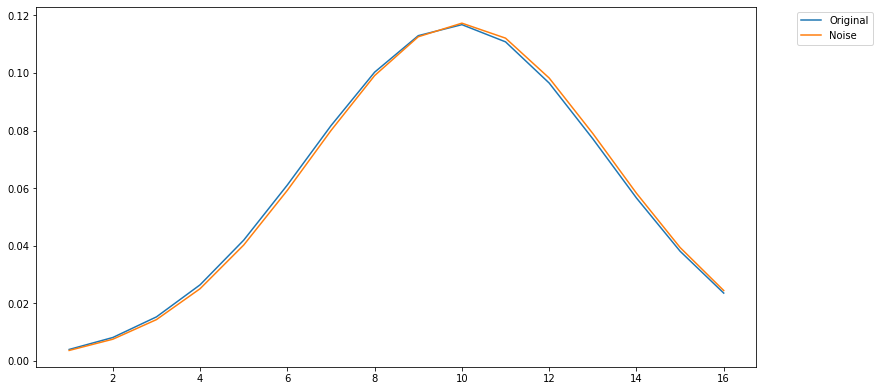

In [7]:
fig= plt.figure(figsize=(1,1))
axes= fig.add_axes([5,5,10,5])
axes.plot(map_dict.keys(), gaussian_list, label = "Original")
axes.plot(map_dict_noise.keys(), gaussian_list_noise, label = "Noise")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [8]:
slope, intercept, r, p, std_err = stats.linregress(data['educ'].to_list(), data['income'].to_list())
slope_1, intercept_1, r_1, p_1, std_err_1 = stats.linregress(data_noise['educ'].to_list(), data_noise['income'].to_list())

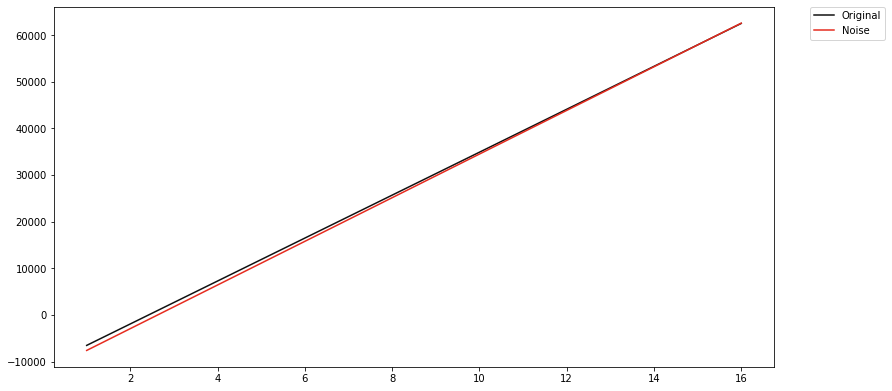

In [9]:
def myfunc(x):
  return slope * x + intercept

def myfunc1(x):
    return slope_1 * x + intercept_1
original = list(map(myfunc, data['educ'].to_list()))
noise = list(map(myfunc1, data_noise['educ'].to_list()))

fig= plt.figure(figsize=(1,1))
axes= fig.add_axes([10,1,10,5])
axes.plot(data['educ'].to_list(), original, color='#111111',label = "Original")
axes.plot(data_noise['educ'].to_list(), noise, color='#e62b1e',label = "Noise")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
math.sqrt(mean_squared_error(data['educ'].to_list(), data['income'].to_list()))

61886.22087271124

In [12]:
math.sqrt(mean_squared_error(data_noise['educ'].to_list(), data['income'].to_list()))

61886.18824586792

In [13]:
data_noise

,age,sex,educ,race,income,married
748,47,1,1,3,0.0,1
859,45,0,1,3,9000.0,0
376,44,1,1,3,18000.0,0
855,39,1,1,3,0.0,1
488,44,1,1,3,0.0,1
647,29,1,1,3,0.0,1
296,32,1,1,4,9530.0,0
190,61,0,1,3,14400.0,1
89,93,1,1,2,6000.0,0
383,84,1,1,4,10500.0,0
